In [1]:
import pandas as pd
import quandl, math, datetime
import numpy as np
from sklearn import preprocessing
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from matplotlib import style
import matplotlib.pyplot as plt
import pickle

In [2]:
style.use('ggplot')

In [3]:
df=quandl.get('WIKI/GOOGL')
df=df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]
df['HL_PCT']=(df['Adj. High']-df['Adj. Close'])/df['Adj. Close']*100
df['PCT_change']=(df['Adj. Close']-df['Adj. Open'])/df['Adj. Open']*100
df

,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,HL_PCT,PCT_change
Date,,,,,,,
2004-08-19,50.159839,52.191109,48.128568,50.322842,44659000.0,3.712563,0.324968
2004-08-20,50.661387,54.708881,50.405597,54.322689,22834300.0,0.710922,7.227007
2004-08-23,55.551482,56.915693,54.693835,54.869377,18256100.0,3.729433,-1.227880
2004-08-24,55.792225,55.972783,51.945350,52.597363,15247300.0,6.417469,-5.726357
2004-08-25,52.542193,54.167209,52.100830,53.164113,9188600.0,1.886792,1.183658
...,...,...,...,...,...,...,...
2018-03-21,1092.570000,1108.700000,1087.210000,1094.000000,1990515.0,1.343693,0.130884
2018-03-22,1080.010000,1083.920000,1049.640000,1053.150000,3418154.0,2.921711,-2.487014
2018-03-23,1051.370000,1066.780000,1024.870000,1026.550000,2413517.0,3.918952,-2.360729


In [4]:
df=df[['Adj. Close','HL_PCT', 'PCT_change','Adj. Volume']]
df.tail()

,Adj. Close,HL_PCT,PCT_change,Adj. Volume
Date,,,,
2018-03-21,1094.00,1.343693,0.130884,1990515.0
2018-03-22,1053.15,2.921711,-2.487014,3418154.0
2018-03-23,1026.55,3.918952,-2.360729,2413517.0
2018-03-26,1054.09,0.491419,0.332191,3272409.0
2018-03-27,1006.94,5.720301,-5.353887,2940957.0


In [5]:
forecast_col='Adj. Close'
df.fillna(-99999, inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_9916\3498239262.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(-99999, inplace=True)


In [6]:
forecast_out=int(math.ceil(0.01*len(df)))
forecast_out

35

In [7]:
df['label']=df[forecast_col].shift(-forecast_out)

C:\Users\Dell\AppData\Local\Temp\ipykernel_9916\1089385948.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label']=df[forecast_col].shift(-forecast_out)


In [8]:
X=np.array(df.drop(['label'],1))
X=preprocessing.scale(X)
X=X[:-forecast_out]
X_lately=X[-forecast_out:]

C:\Users\Dell\AppData\Local\Temp\ipykernel_9916\3174773579.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=np.array(df.drop(['label'],1))


In [9]:
df.dropna(inplace=True)
y=np.array(df['label'])

C:\Users\Dell\AppData\Local\Temp\ipykernel_9916\1888149904.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [11]:
"""clf=LinearRegression(n_jobs=-1)
clf.fit(X_train,y_train)
with open('linearregression.pickle','wb') as f:
    pickle.dump(clf,f)"""
accuracy=clf.score(X_test,y_test)
forecast_set=clf.predict(X_lately)
df['Forecast']=np.nan
forecast_set,accuracy,forecast_out

C:\Users\Dell\AppData\Local\Temp\ipykernel_9916\930622138.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Forecast']=np.nan


(array([1076.36692443, 1090.89068758, 1104.83952033, 1099.71465719,
        1093.3171821 , 1090.62748847, 1088.98269611, 1085.98874412,
        1079.87363581, 1075.50298376, 1073.12269354, 1092.09641538,
        1110.54148013, 1115.43425475, 1130.17764131, 1134.25558934,
        1133.0964422 , 1130.42797306, 1132.29215076, 1150.22075734,
        1149.93678919, 1159.82231749, 1156.50443695, 1164.1114402 ,
        1184.04847473, 1196.75180004, 1191.36171664, 1203.06137169,
        1208.6703552 , 1206.69019221, 1197.4386014 , 1203.06994924,
        1201.55688718, 1137.48786697, 1084.68558344]),
 0.9780449658560321,
 35)

In [12]:
last_date=df.iloc[-1].name
last_unix=last_date.timestamp()
one_day=86400
next_unix=last_unix+one_day

In [13]:
for i in forecast_set:
    next_date=datetime.datetime.fromtimestamp(next_unix)
    next_unix+=one_day
    df.loc[next_date]=[np.nan for _ in range(len(df.columns)-1)]+[i]
df.tail()    

C:\Users\Dell\AppData\Local\Temp\ipykernel_9916\368135331.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[next_date]=[np.nan for _ in range(len(df.columns)-1)]+[i]
C:\Users\Dell\AppData\Local\Temp\ipykernel_9916\368135331.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[next_date]=[np.nan for _ in range(len(df.columns)-1)]+[i]
C:\Users\Dell\AppData\Local\Temp\ipykernel_9916\368135331.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-

C:\Users\Dell\AppData\Local\Temp\ipykernel_9916\368135331.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[next_date]=[np.nan for _ in range(len(df.columns)-1)]+[i]
C:\Users\Dell\AppData\Local\Temp\ipykernel_9916\368135331.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[next_date]=[np.nan for _ in range(len(df.columns)-1)]+[i]
C:\Users\Dell\AppData\Local\Temp\ipykernel_9916\368135331.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label,Forecast
Date,,,,,,
2018-03-07 20:00:00,NaN,NaN,NaN,NaN,NaN,1197.438601
2018-03-08 20:00:00,NaN,NaN,NaN,NaN,NaN,1203.069949
2018-03-09 20:00:00,NaN,NaN,NaN,NaN,NaN,1201.556887
2018-03-10 20:00:00,NaN,NaN,NaN,NaN,NaN,1137.487867
2018-03-11 20:00:00,NaN,NaN,NaN,NaN,NaN,1084.685583


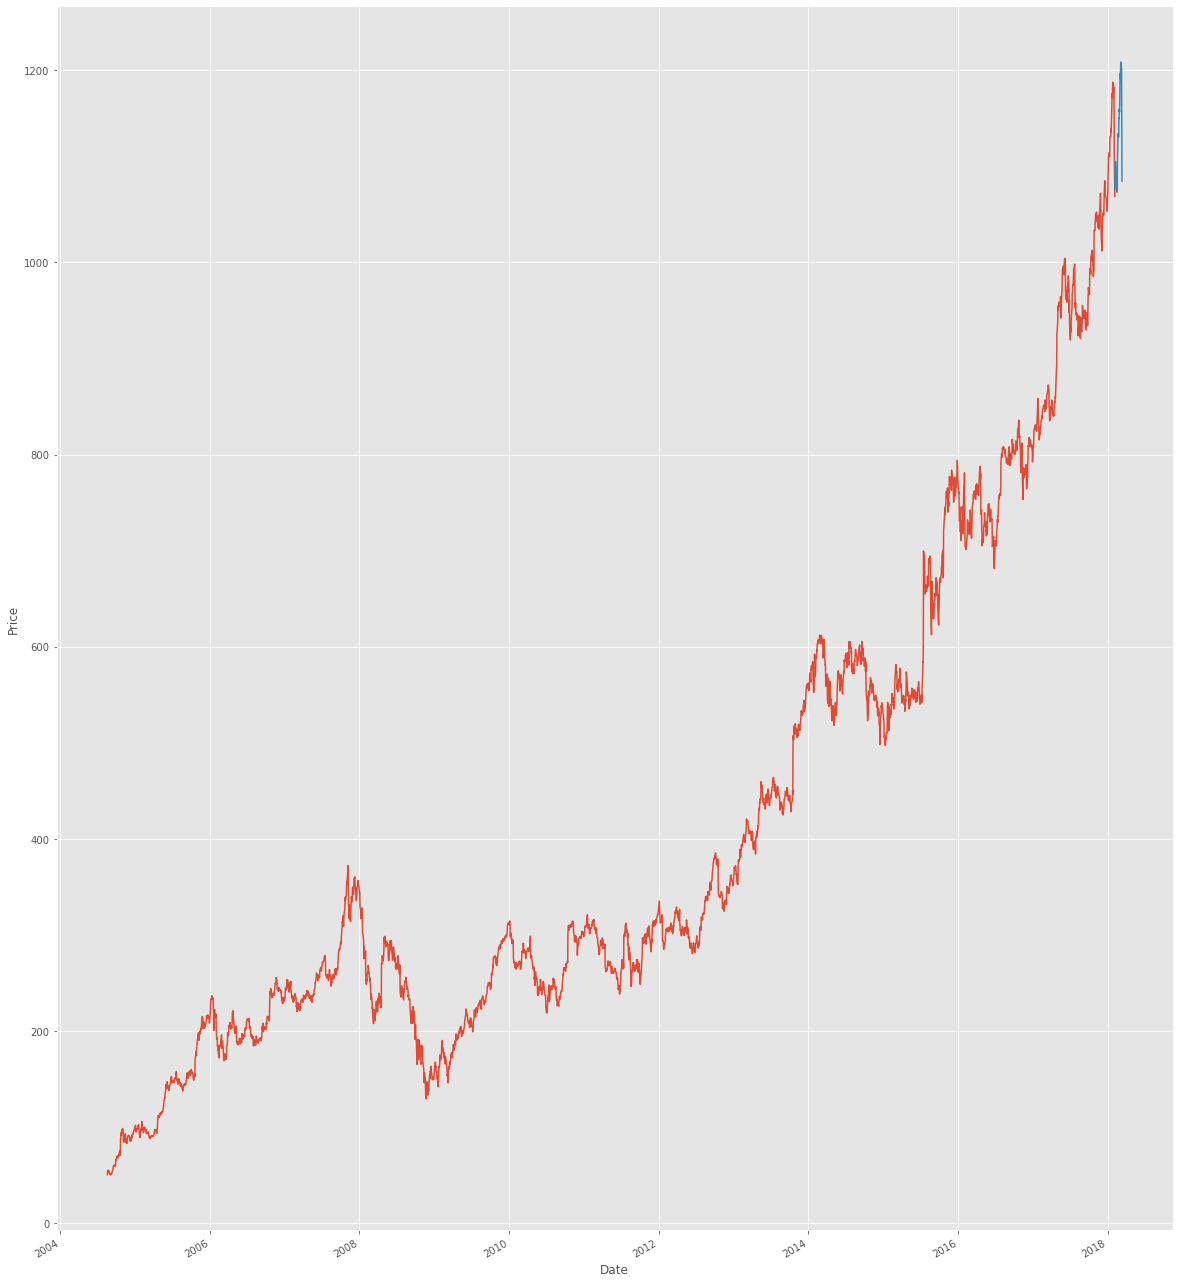

In [14]:
df['Adj. Close'].plot(figsize=(20,25))
df['Forecast'].plot(figsize=(20,25))
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [15]:
pickle_in=open('linearregression.pickle','rb')
clf=pickle.load(pickle_in)